In [22]:
import sys
import os

# Not ideal but since it is only an excercise...
PATH = r'/scratch/brussel/102/vsc10255/DL-project/experimental'
PRODUCTION = os.path.join(PATH, os.pardir, 'production')
sys.path.append(PRODUCTION)

import logging
import torch
from torchvision import datasets, transforms
from PIL import Image
from models import LeNet5
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
MODELPATH = os.path.join(PRODUCTION, 'runs', 'LeNet5_on_01-16-2022_14.39.36', 'LeNet5_on_01-16-2022_14.39.36', 'LeNet5_on_01-16-2022_14.39.36_inference.pt')
IMAGEPATH = os.path.join(PATH, os.pardir, 'inference', 'images', '017.png')

In [56]:
def invert(x):
    return 1-x

def preprocess(image_path):

    # Define a transformer for preprocessing
    transformer = transforms.Compose([
        # Resize to 32x32 as per the model
        transforms.Resize(32),
        # Images need to be grayscale aswel
        transforms.Grayscale(),
        
        transforms.CenterCrop(20),
        transforms.Resize(32),

        # Conversion to tensor
        transforms.ToTensor(),
        lambda img: img.apply_(invert),
    ])

    # Load the image with PILLOW as this is what pyvision uses internally
    im = Image.open(image_path)

    return transformer(im)

In [57]:
image = preprocess(IMAGEPATH)

In [58]:
image = image.squeeze()

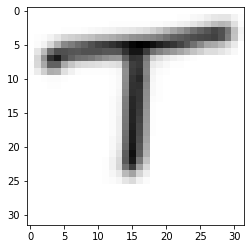

In [59]:
plt.imshow(image, cmap='binary')

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [ ]:
if __name__ == '__main__':

    log = logging.getLogger()
    log.setLevel(logging.INFO)

    formatter = logging.Formatter('%(asctime)s:%(levelname)s:%(message)s')

    sh = logging.StreamHandler(sys.stdout)
    sh.setLevel(logging.DEBUG)
    sh.setFormatter(formatter)

    log.addHandler(sh)

    

    LABEL_MAP = {
        # not PEP8 formatted, but readable
        0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
        10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
        20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
        30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z',
        36: 'a', 37: 'b', 38: 'd', 39: 'e',
        40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't',
    }

    logging.info(f'The used model is located at {MODELPATH}')
    logging.info(f'The folder with images for which the predictions will be made is located at {IMAGEPATH}')

    # load and preprocess the image
    logging.info('Preprocessing the image')
    image = preprocess(IMAGEPATH)

    # the model expects batches, since we only have 1 image, we need to add a dimension for the batch
    image = image.unsqueeze(0)

    logging.info('Loading the model')
    # get the network architecture
    model = LeNet5(47)

    # load the model weights etc. onto the CPU for portability
    model.load_state_dict(torch.load(MODELPATH, map_location=torch.device('cpu')))

    # make the prediction
    logging.info('Predicting the label for the image')
    output = model(image)

    # Get the prediction which is most likely our target
    values, prediction = torch.max(output.data, 1)

    print(output.data)
    print(prediction.item())
    
    # Translate the predicted value to a character
    result = LABEL_MAP[prediction.item()]
    logging.info('====================')
    logging.info(f'The image represent a {result}.')
    logging.info('====================')